# EEG Classification with Multiple Models
This notebook implements and compares various machine learning and deep learning models:
- **Artificial Neural Network (ANN)**
- **K-Nearest Neighbors (KNN)**
- **Convolutional Neural Network (CNN)**
- **Long Short-Term Memory (LSTM)**
- **Bidirectional LSTM (BiLSTM)**
- **CNN + LSTM Hybrid**
- **CNN + BiLSTM Hybrid**

Each model is trained, evaluated, and compared based on performance metrics and visualizations.

## Data Preprocessing
This section includes loading the dataset, handling missing values, encoding categorical data, scaling features, and splitting the data.

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# Load the dataset
file_path = "./EEG.machinelearing_data_BRMH.csv"
df = pd.read_csv(file_path)

# Remove non-numeric or unwanted columns (e.g., 'eeg.date')
df.drop(columns=['eeg.date'], errors='ignore', inplace=True)

# Encode categorical target column ('main.disorder')
le = LabelEncoder()
df['main.disorder'] = le.fit_transform(df['main.disorder'])

# Save encoded labels for later use
label_mapping = dict(zip(le.classes_, range(len(le.classes_))))
print("Label Encoding:", label_mapping)

# Separate features and target
X = df.drop(columns=['main.disorder'])
y = df['main.disorder']
# Check data types
print(X.dtypes)

# Identify non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)


Label Encoding: {'Addictive disorder': 0, 'Anxiety disorder': 1, 'Healthy control': 2, 'Mood disorder': 3, 'Obsessive compulsive disorder': 4, 'Schizophrenia': 5, 'Trauma and stress related disorder': 6}
no.                        int64
sex                       object
age                      float64
education                float64
IQ                       float64
                          ...   
COH.F.gamma.p.P4.r.O1    float64
COH.F.gamma.p.P4.s.O2    float64
COH.F.gamma.q.T6.r.O1    float64
COH.F.gamma.q.T6.s.O2    float64
COH.F.gamma.r.O1.s.O2    float64
Length: 1147, dtype: object
Non-numeric columns: Index(['sex', 'specific.disorder'], dtype='object')


In [8]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to numeric
for col in non_numeric_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

print("✅ All categorical columns converted to numeric.")


✅ All categorical columns converted to numeric.


In [9]:
from sklearn.feature_selection import VarianceThreshold

# Remove low-variance features (Threshold: 0.01)
var_thresh = VarianceThreshold(threshold=0.01)
X_reduced = var_thresh.fit_transform(X)

print(f"Original features: {X.shape[1]}, After low-variance removal: {X_reduced.shape[1]}")


Original features: 1147, After low-variance removal: 1146


C:\Users\abhik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_selection\_variance_threshold.py:112: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


In [10]:
from sklearn.impute import SimpleImputer
import numpy as np

# Impute missing values with column mean
imputer = SimpleImputer(strategy="mean")
X_reduced = imputer.fit_transform(X_reduced)

# Check if NaNs are removed
print("NaNs remaining after imputation:", np.isnan(X_reduced).sum())


NaNs remaining after imputation: 0


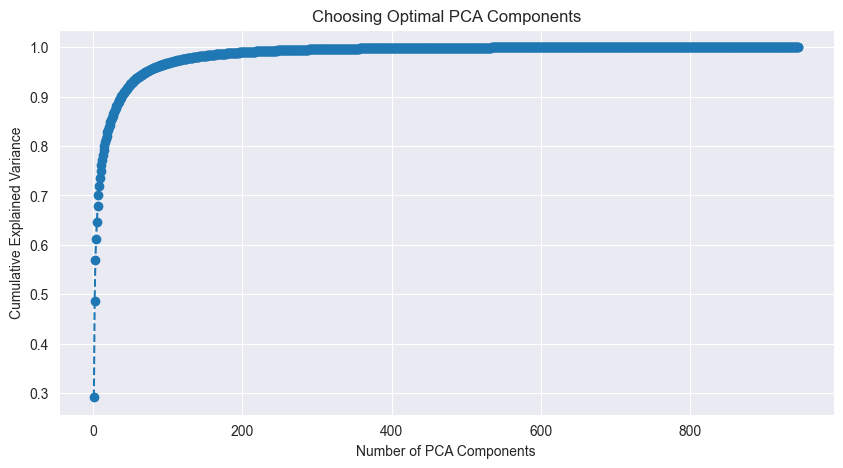

🔹 Components needed for 95% variance: 71
🔹 Components needed for 99% variance: 203


In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA without specifying components to analyze variance
pca_full = PCA()
pca_full.fit(X_reduced)

# Calculate cumulative variance explained
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Plot explained variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Choosing Optimal PCA Components')
plt.grid(True)
plt.show()

# Find required components
components_95 = np.argmax(cumulative_variance >= 0.95) + 1
components_99 = np.argmax(cumulative_variance >= 0.99) + 1

print(f"🔹 Components needed for 95% variance: {components_95}")
print(f"🔹 Components needed for 99% variance: {components_99}")


In [12]:
from sklearn.decomposition import PCA

# Apply PCA with 203 components
pca = PCA(n_components=203)
X_pca = pca.fit_transform(X_reduced)

print(f"✅ Reduced dataset shape after PCA: {X_pca.shape}")  # Should be (samples, 203)


✅ Reduced dataset shape after PCA: (945, 203)


In [13]:
!pip install numpy pandas scikit-learn tensorflow matplotlib imbalanced-learn


  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached wrapt-1.17.2-cp311-cp311-win_amd64.whl.metadata (6.5 kB)
  Using cached numpy-2.1.3-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached h5py-3.13.0-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Using cached ml_dtypes-0.5.1-cp311-cp311-win_amd64.whl.metadata (22 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp311-cp311-win_amd64.whl.metadata (14 kB)
  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ultralytics 8.3.91 requires numpy<=2.1.1,>=1.23.0, but 

In [9]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_pca, y)

# Print new class distribution
unique, counts = np.unique(y_balanced, return_counts=True)
print("✅ Class distribution after SMOTE:", dict(zip(unique, counts)))


✅ Class distribution after SMOTE: {np.int64(0): np.int64(266), np.int64(1): np.int64(266), np.int64(2): np.int64(266), np.int64(3): np.int64(266), np.int64(4): np.int64(266), np.int64(5): np.int64(266), np.int64(6): np.int64(266)}


In [10]:
# Convert back to DataFrame
df_final = pd.DataFrame(X_balanced, columns=[f'PC{i+1}' for i in range(X_balanced.shape[1])])
df_final['main.disorder'] = y_balanced  # Add target column

# Save to Google Drive
save_path = "/content/drive/My Drive/DLdataset/EEG_final_preprocessed_99PCA.csv"
df_final.to_csv(save_path, index=False)

print(f"✅ Final preprocessed dataset saved at: {save_path}")


✅ Final preprocessed dataset saved at: /content/drive/My Drive/DLdataset/EEG_final_preprocessed_99PCA.csv


In [11]:
if 'main.disorder' in df_final.columns:
    print("✅ 'main.disorder' is present in the dataset!")
else:
    print("❌ 'main.disorder' is missing!")

✅ 'main.disorder' is present in the dataset!


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load preprocessed dataset
save_path = "/content/drive/My Drive/DLdataset/EEG_final_preprocessed_99PCA.csv"
df_final = pd.read_csv(save_path)

# Separate features and target
X = df_final.drop(columns=['main.disorder']).values
y = df_final['main.disorder'].values

# Convert target to categorical (one-hot encoding)
num_classes = len(np.unique(y))
y = to_categorical(y, num_classes=num_classes)

# Split into train-test (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape for CNN input (Adding channel dimension)
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

print(f"✅ Data ready! Train shape: {X_train.shape}, Test shape: {X_test.shape}")


✅ Data ready! Train shape: (1489, 203, 1), Test shape: (373, 203, 1)


## K-Nearest Neighbors (KNN) Model
KNN is a simple yet effective classification algorithm.

In [13]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

X_train_knn = X_train.reshape(X_train.shape[0], -1)  # Flatten to 2D
X_test_knn = X_test.reshape(X_test.shape[0], -1)

knn_params = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
knn_model = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy', n_jobs=-1)
knn_model.fit(X_train_knn, y_train)

print(f"KNN Best Accuracy: {knn_model.best_score_:.4f}")





KNN Best Accuracy: 0.6978


## Artificial Neural Network (ANN)

In [14]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

ann_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
ann_history = ann_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1544 - loss: 48.0747 - val_accuracy: 0.2869 - val_loss: 12.2424
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2696 - loss: 18.2662 - val_accuracy: 0.3244 - val_loss: 5.9782
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2828 - loss: 9.8203 - val_accuracy: 0.3566 - val_loss: 2.8712
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3316 - loss: 5.3925 - val_accuracy: 0.3351 - val_loss: 2.0725
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2708 - loss: 4.1484 - val_accuracy: 0.3190 - val_loss: 1.8157
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2875 - loss: 3.0821 - val_accuracy: 0.3029 - val_loss: 1.7865
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2780 - loss: 2.6874 - val_accuracy: 0.3003 - val_loss: 1.8068
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2656 - loss: 2.1790 - val_accuracy: 0.2976 - val_loss: 

## Convolutional Neural Network (CNN)

In [15]:

from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

cnn_model = Sequential([
    Conv1D(filters=128, kernel_size=5, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_history = cnn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.1890 - loss: 10.2856 - val_accuracy: 0.1394 - val_loss: 1.9015
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.1848 - loss: 1.8719 - val_accuracy: 0.1877 - val_loss: 1.8704
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.2304 - loss: 1.8511 - val_accuracy: 0.1930 - val_loss: 1.8238
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.2525 - loss: 1.7952 - val_accuracy: 0.1743 - val_loss: 1.8440
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.2811 - loss: 1.7322 - val_accuracy: 0.2359 - val_loss: 1.7689
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.2871 - loss: 1.7121 - val_accuracy: 0.2520 - val_loss: 1.7679
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.2868 - loss: 1.6854 - val_accuracy: 0.2601 - val_loss: 1.7333
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.3005 - loss: 1.6641 - val_accuracy: 0.2627 - val_

## Long Short-Term Memory (LSTM)

In [16]:

from tensorflow.keras.layers import LSTM

lstm_model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(64),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_history = lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 240ms/step - accuracy: 0.1623 - loss: 1.9471 - val_accuracy: 0.1716 - val_loss: 1.9339
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 224ms/step - accuracy: 0.1987 - loss: 1.9288 - val_accuracy: 0.1743 - val_loss: 1.9058
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 241ms/step - accuracy: 0.2072 - loss: 1.9133 - val_accuracy: 0.2064 - val_loss: 1.8909
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 244ms/step - accuracy: 0.2304 - loss: 1.8729 - val_accuracy: 0.1823 - val_loss: 1.8926
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 232ms/step - accuracy: 0.2367 - loss: 1.8563 - val_accuracy: 0.1984 - val_loss: 1.8599
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 243ms/step - accuracy: 0.2715 - loss: 1.7960 - val_accuracy: 0.2252 - val_loss: 1.8648
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 240ms/step - accuracy: 0.3096 - loss: 1.7739 - val_accuracy: 0.2332 - val_loss: 1.8258
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 237ms/step - accuracy: 0.3195 - loss: 1.7394 - val_accuracy

## Bidirectional LSTM (BiLSTM)

In [17]:

from tensorflow.keras.layers import Bidirectional

bilstm_model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True), input_shape=(X_train.shape[1], 1)),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

bilstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
bilstm_history = bilstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 35s 636ms/step - accuracy: 0.1835 - loss: 1.9316 - val_accuracy: 0.2386 - val_loss: 1.8535
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 28s 600ms/step - accuracy: 0.2661 - loss: 1.8181 - val_accuracy: 0.2681 - val_loss: 1.7912
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 28s 592ms/step - accuracy: 0.3054 - loss: 1.7151 - val_accuracy: 0.2788 - val_loss: 1.7069
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 28s 597ms/step - accuracy: 0.3566 - loss: 1.6277 - val_accuracy: 0.3566 - val_loss: 1.6209
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 28s 592ms/step - accuracy: 0.4106 - loss: 1.5461 - val_accuracy: 0.3700 - val_loss: 1.6006
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 28s 592ms/step - accuracy: 0.4102 - loss: 1.4633 - val_accuracy: 0.3780 - val_loss: 1.5267
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 28s 590ms/step - accuracy: 0.4968 - loss: 1.3552 - val_accuracy: 0.4397 - val_loss: 1.4194
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 28s 592ms/step - accuracy: 0.5717 - loss: 1.2043 - val_accuracy

## CNN + LSTM Hybrid

In [18]:

cnn_lstm_model = Sequential([
    Conv1D(filters=128, kernel_size=5, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    LSTM(64),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

cnn_lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_lstm_history = cnn_lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.1701 - loss: 1.9512 - val_accuracy: 0.2064 - val_loss: 1.9128
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.2052 - loss: 1.9042 - val_accuracy: 0.1769 - val_loss: 1.9108
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.2163 - loss: 1.8802 - val_accuracy: 0.2064 - val_loss: 1.8861
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.2514 - loss: 1.8362 - val_accuracy: 0.2601 - val_loss: 1.8679
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.2845 - loss: 1.8057 - val_accuracy: 0.2601 - val_loss: 1.8427
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.3170 - loss: 1.7434 - val_accuracy: 0.2493 - val_loss: 1.7964
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.3514 - loss: 1.6888 - val_accuracy: 0.3029 - val_loss: 1.7468
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.3636 - loss: 1.6524 - val_accuracy: 0.

## CNN + BiLSTM Hybrid

In [19]:

cnn_bilstm_model = Sequential([
    Conv1D(filters=128, kernel_size=5, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

cnn_bilstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_bilstm_history = cnn_bilstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 186ms/step - accuracy: 0.1625 - loss: 1.9425 - val_accuracy: 0.2413 - val_loss: 1.8811
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 159ms/step - accuracy: 0.2865 - loss: 1.8088 - val_accuracy: 0.2922 - val_loss: 1.8042
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - accuracy: 0.3567 - loss: 1.7077 - val_accuracy: 0.3217 - val_loss: 1.6944
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - accuracy: 0.3365 - loss: 1.6427 - val_accuracy: 0.3780 - val_loss: 1.6126
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 159ms/step - accuracy: 0.4010 - loss: 1.5474 - val_accuracy: 0.3914 - val_loss: 1.5955
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 162ms/step - accuracy: 0.4412 - loss: 1.4339 - val_accuracy: 0.3861 - val_loss: 1.5379
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 162ms/step - accuracy: 0.4661 - loss: 1.4334 - val_accuracy: 0.3995 - val_loss: 1.4623
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 160ms/step - accuracy: 0.5187 - loss: 1.2933 - val_acc

## Model Performance Comparison
We compare the accuracy, loss, precision, recall, and F1-score of each model.

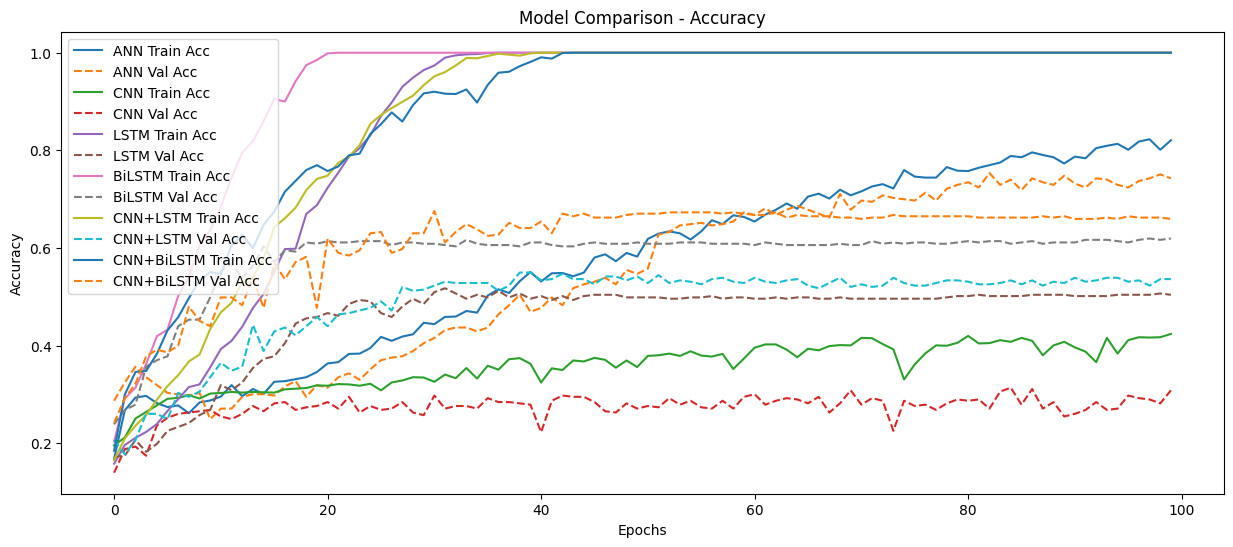

In [20]:

import matplotlib.pyplot as plt

def plot_history(histories, labels):
    plt.figure(figsize=(15, 6))

    for i, history in enumerate(histories):
        plt.plot(history.history['accuracy'], label=f'{labels[i]} Train Acc')
        plt.plot(history.history['val_accuracy'], linestyle='dashed', label=f'{labels[i]} Val Acc')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Model Comparison - Accuracy')
    plt.show()

plot_history([ann_history, cnn_history, lstm_history, bilstm_history, cnn_lstm_history, cnn_bilstm_history],
             ['ANN', 'CNN', 'LSTM', 'BiLSTM', 'CNN+LSTM', 'CNN+BiLSTM'])


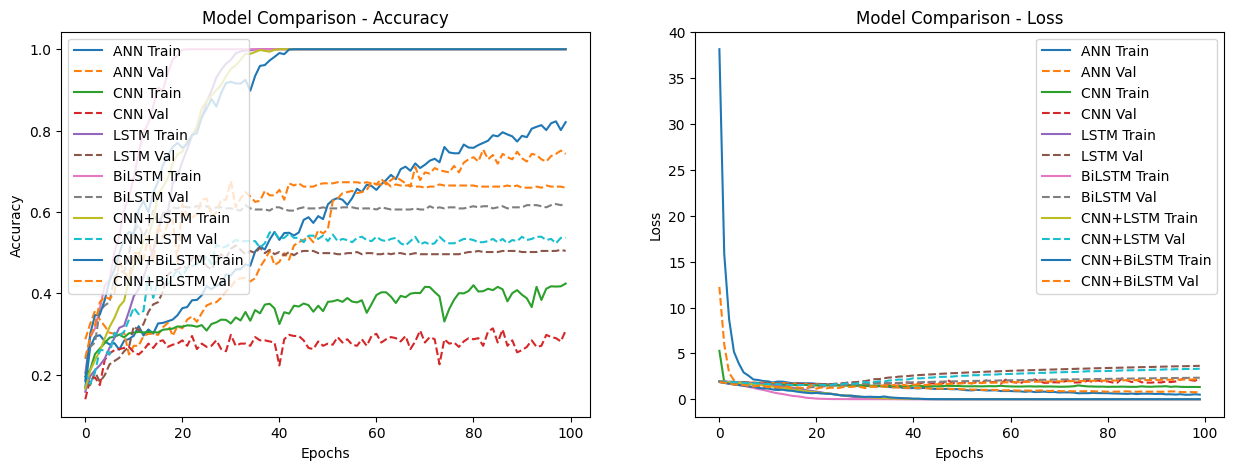

In [21]:
import matplotlib.pyplot as plt

# List of histories and labels
histories = [ann_history, cnn_history, lstm_history, bilstm_history, cnn_lstm_history, cnn_bilstm_history]
labels = ['ANN', 'CNN', 'LSTM', 'BiLSTM', 'CNN+LSTM', 'CNN+BiLSTM']

# Function to plot accuracy and loss
def plot_model_comparison(histories, labels):
    plt.figure(figsize=(15, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    for i, history in enumerate(histories):
        plt.plot(history.history['accuracy'], label=f'{labels[i]} Train')
        plt.plot(history.history['val_accuracy'], linestyle='dashed', label=f'{labels[i]} Val')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Model Comparison - Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    for i, history in enumerate(histories):
        plt.plot(history.history['loss'], label=f'{labels[i]} Train')
        plt.plot(history.history['val_loss'], linestyle='dashed', label=f'{labels[i]} Val')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Model Comparison - Loss')
    plt.legend()

    plt.show()

plot_model_comparison(histories, labels)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


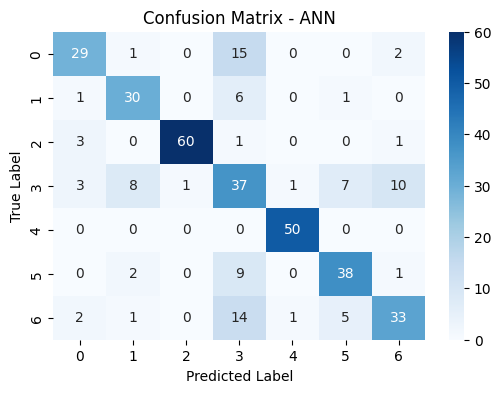

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


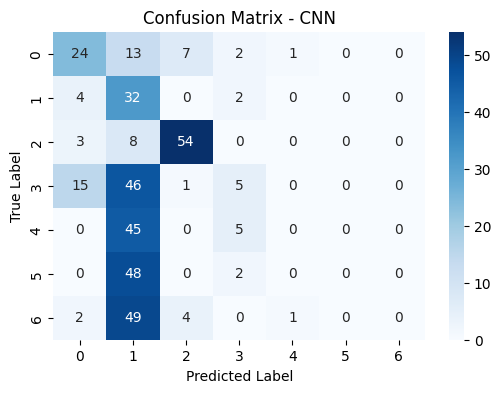

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step


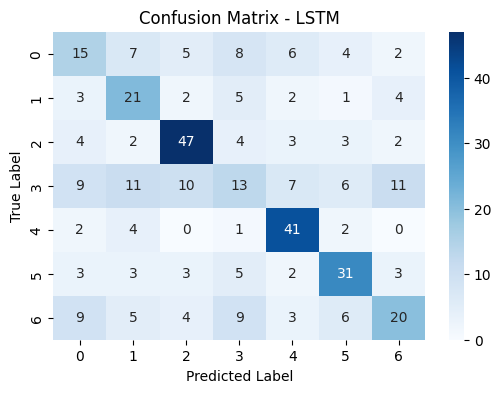

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 191ms/step


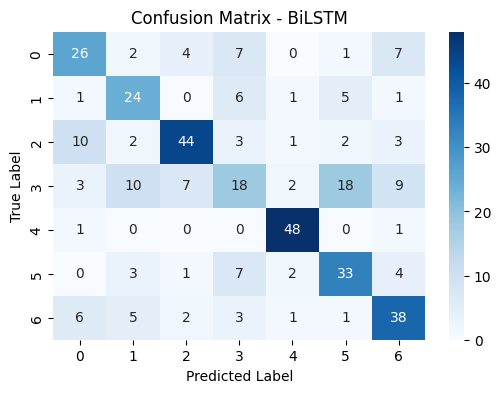

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


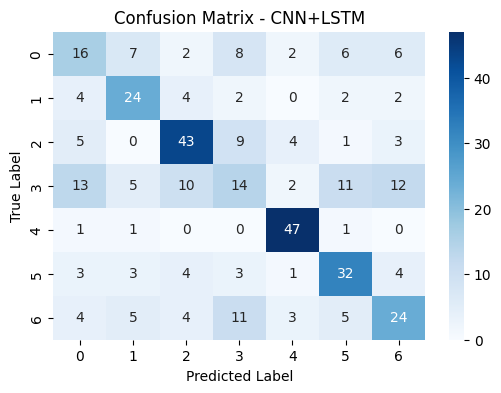

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step


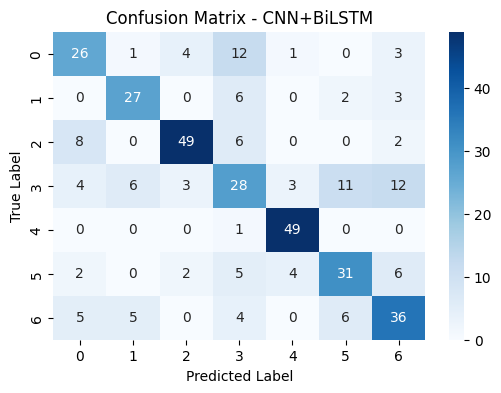

In [22]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels
    y_true_classes = y_test.argmax(axis=1)  # Convert one-hot to class labels

    cm = confusion_matrix(y_true_classes, y_pred_classes)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Generate confusion matrices
for model, name in zip([ann_model, cnn_model, lstm_model, bilstm_model, cnn_lstm_model, cnn_bilstm_model], labels):
    plot_confusion_matrix(model, X_test, y_test, name)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
 1/12 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


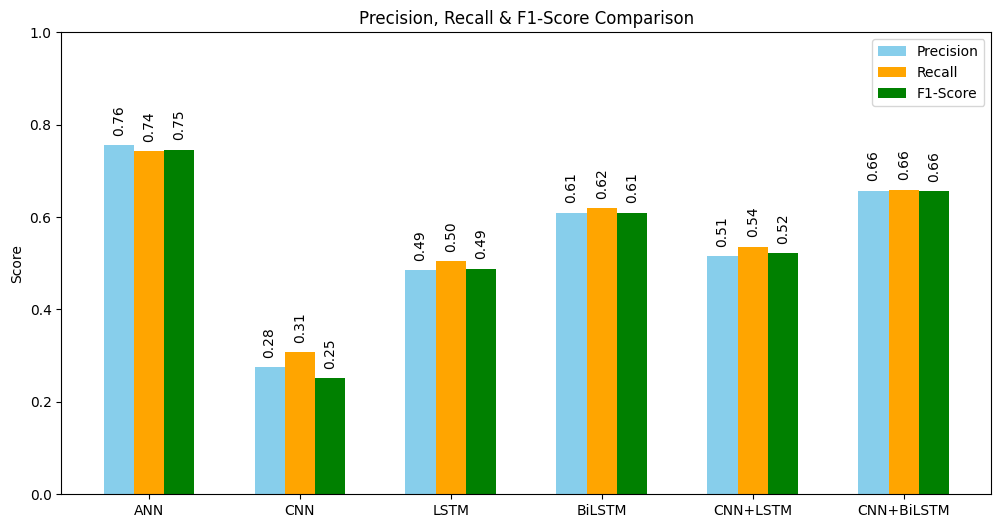

In [25]:
from sklearn.metrics import classification_report
import numpy as np

# Function to generate precision, recall, and F1-score with vertical values
def plot_classification_metrics(models, labels, X_test, y_test):
    precision_scores, recall_scores, f1_scores = [], [], []

    for model in models:
        y_pred = model.predict(X_test).argmax(axis=1)
        y_true = y_test.argmax(axis=1)
        report = classification_report(y_true, y_pred, output_dict=True)

        precision_scores.append(report['weighted avg']['precision'])
        recall_scores.append(report['weighted avg']['recall'])
        f1_scores.append(report['weighted avg']['f1-score'])

    # Bar chart configuration
    metrics = ['Precision', 'Recall', 'F1-Score']
    values = [precision_scores, recall_scores, f1_scores]

    x = np.arange(len(labels))  # Number of models
    width = 0.2  # Bar width

    plt.figure(figsize=(12, 6))

    for i, (metric, scores, color) in enumerate(zip(metrics, values, ['skyblue', 'orange', 'green'])):
        bars = plt.bar(x + i * width, scores, width, label=metric, color=color)

        # Display values vertically above bars
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f"{height:.2f}",
                     ha='center', va='bottom', rotation=90, fontsize=10)

    plt.xticks(x + width, labels)  # Model names on X-axis
    plt.ylabel('Score')
    plt.ylim(0, 1)  # Scores range from 0 to 1
    plt.title('Precision, Recall & F1-Score Comparison')
    plt.legend()

    plt.show()

plot_classification_metrics(
    [ann_model, cnn_model, lstm_model, bilstm_model, cnn_lstm_model, cnn_bilstm_model],
    labels, X_test, y_test
)


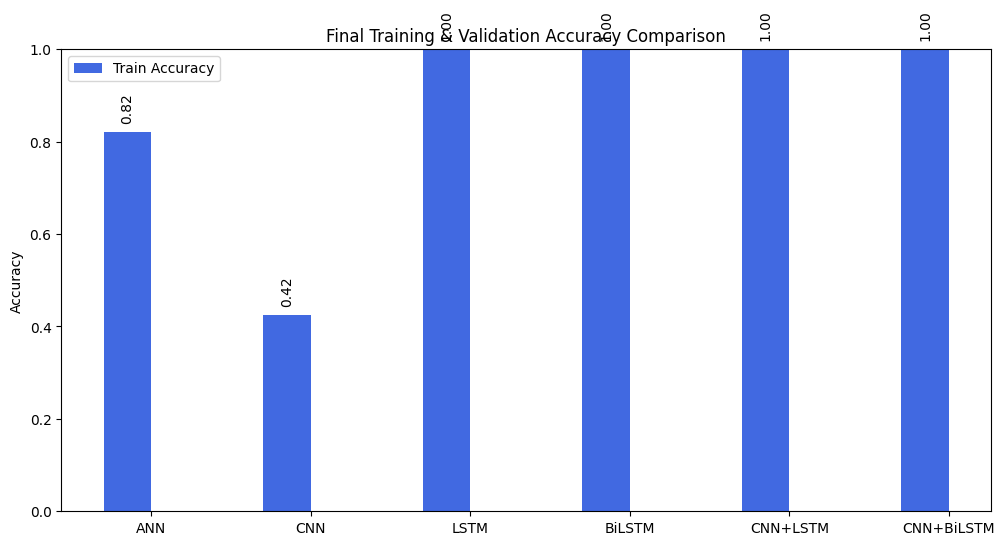

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# List of model histories and labels
histories = [ann_history, cnn_history, lstm_history, bilstm_history, cnn_lstm_history, cnn_bilstm_history]
labels = ['ANN', 'CNN', 'LSTM', 'BiLSTM', 'CNN+LSTM', 'CNN+BiLSTM']

# Extract the last epoch accuracy for training & validation
train_accuracies = [history.history['accuracy'][-1] for history in histories]
val_accuracies = [history.history['val_accuracy'][-1] for history in histories]

# Bar chart configuration
x = np.arange(len(labels))  # Number of models
width = 0.3  # Bar width

plt.figure(figsize=(12, 6))

# Plot bars for training and validation accuracy
bars1 = plt.bar(x - width/2, train_accuracies, width, label='Train Accuracy', color='royalblue')
#bars2 = plt.bar(x + width/2, val_accuracies, width, label='Validation Accuracy', color='darkorange')

# Display values vertically above each bar
for bars in [bars1]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f"{height:.2f}",
                 ha='center', va='bottom', rotation=90, fontsize=10)

plt.xticks(x, labels)  # Model names on X-axis
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.title('Final Training & Validation Accuracy Comparison')
plt.legend()

plt.show()


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


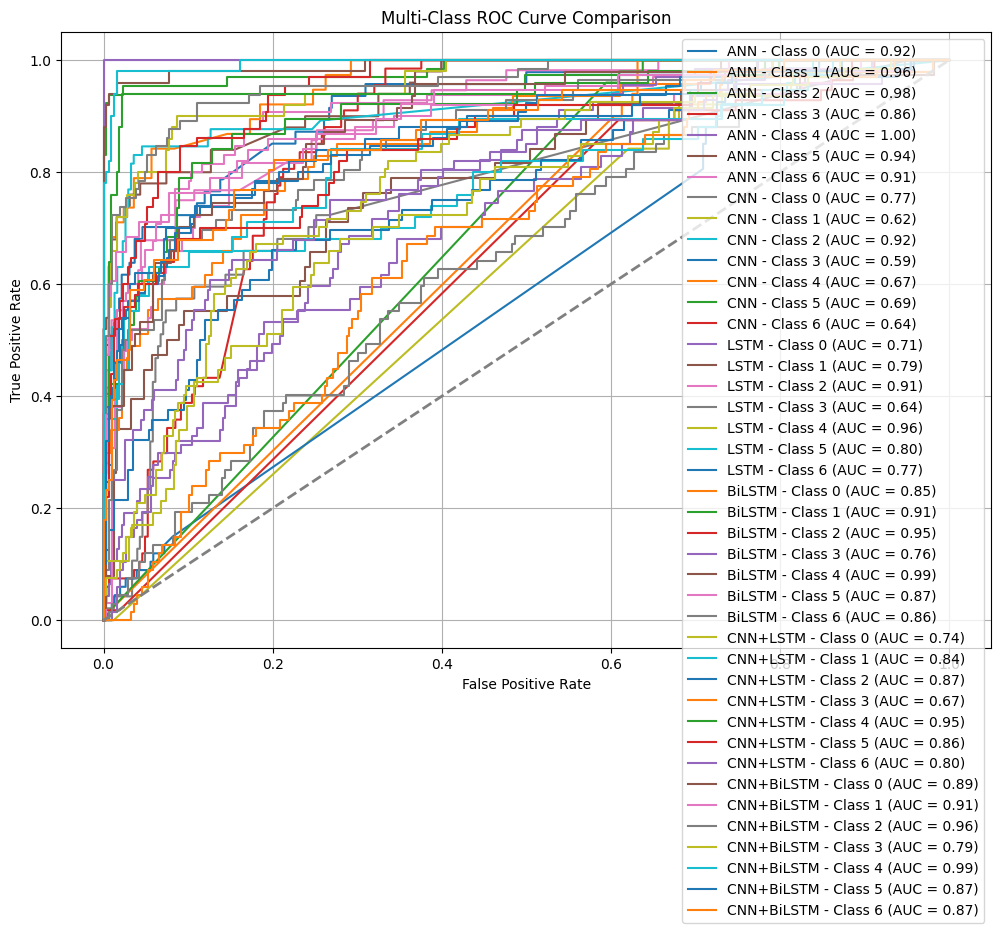

In [30]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Function to plot multi-class ROC curves
def plot_multiclass_roc(models, labels, X_test, y_test):
    n_classes = y_test.shape[1]  # Number of classes
    plt.figure(figsize=(12, 8))

    for model, label in zip(models, labels):
        y_probs = model.predict(X_test)  # Model probability outputs
        y_true = y_test  # One-hot encoded true labels

        # Compute ROC curve and AUC for each class
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_true[:, i], y_probs[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'{label} - Class {i} (AUC = {roc_auc:.2f})')

    # Plot random chance line
    plt.plot([0, 1], [0, 1], linestyle='dashed', color='gray', lw=2)

    # Labels & title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-Class ROC Curve Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function with models and labels
plot_multiclass_roc(
    [ann_model, cnn_model, lstm_model, bilstm_model, cnn_lstm_model, cnn_bilstm_model],
    ['ANN', 'CNN', 'LSTM', 'BiLSTM', 'CNN+LSTM', 'CNN+BiLSTM'],
    X_test, y_test
)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


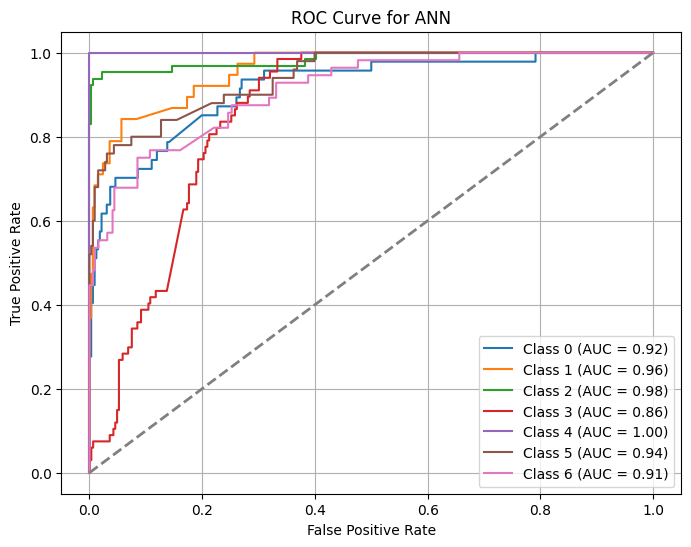

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


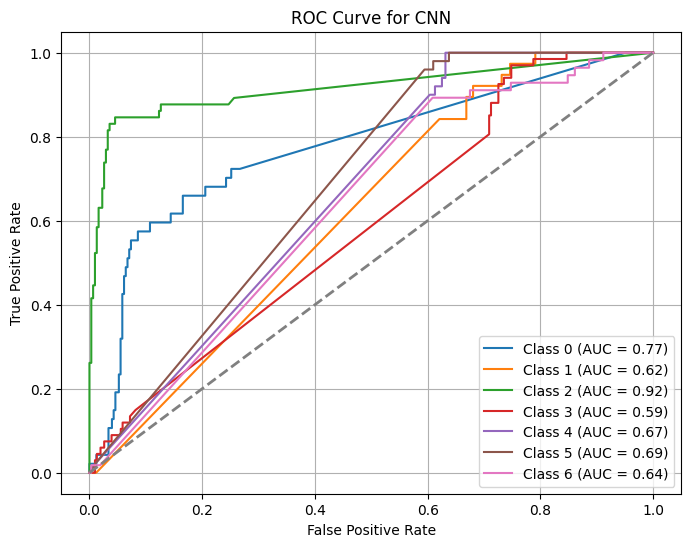

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step


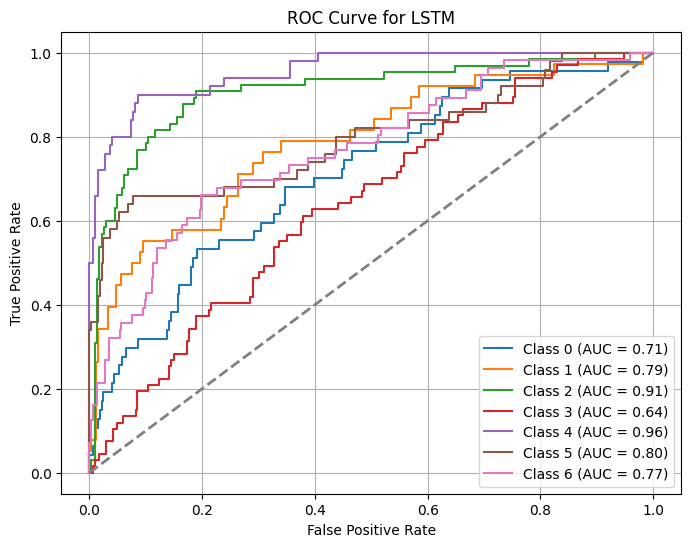

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step


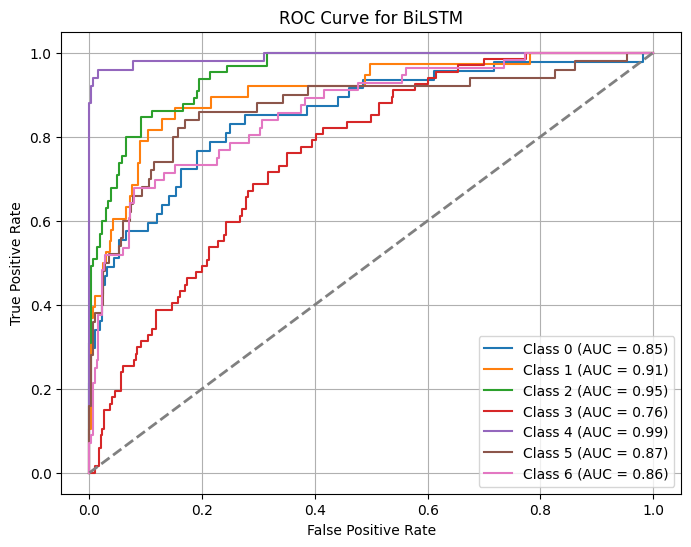

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


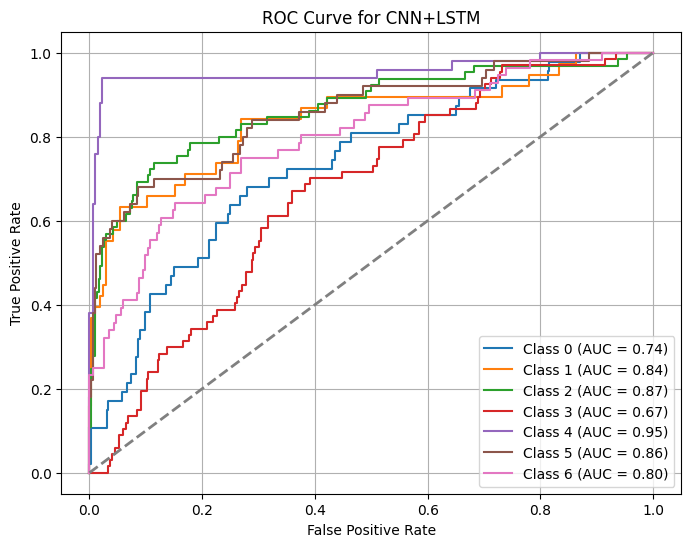

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


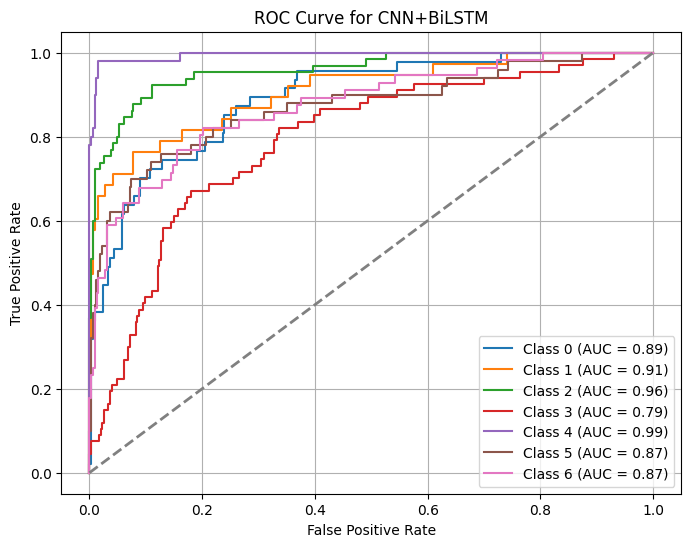

In [31]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Function to plot ROC curve for a single model
def plot_roc_curve(model, model_name, X_test, y_test):
    n_classes = y_test.shape[1]  # Number of classes
    plt.figure(figsize=(8, 6))

    y_probs = model.predict(X_test)  # Model probability outputs
    y_true = y_test  # One-hot encoded true labels

    # Compute ROC curve and AUC for each class
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_true[:, i], y_probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

    # Plot random chance line
    plt.plot([0, 1], [0, 1], linestyle='dashed', color='gray', lw=2)

    # Labels & title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function for each model separately
models = [ann_model, cnn_model, lstm_model, bilstm_model, cnn_lstm_model, cnn_bilstm_model]
labels = ['ANN', 'CNN', 'LSTM', 'BiLSTM', 'CNN+LSTM', 'CNN+BiLSTM']

for model, label in zip(models, labels):
    plot_roc_curve(model, label, X_test, y_test)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


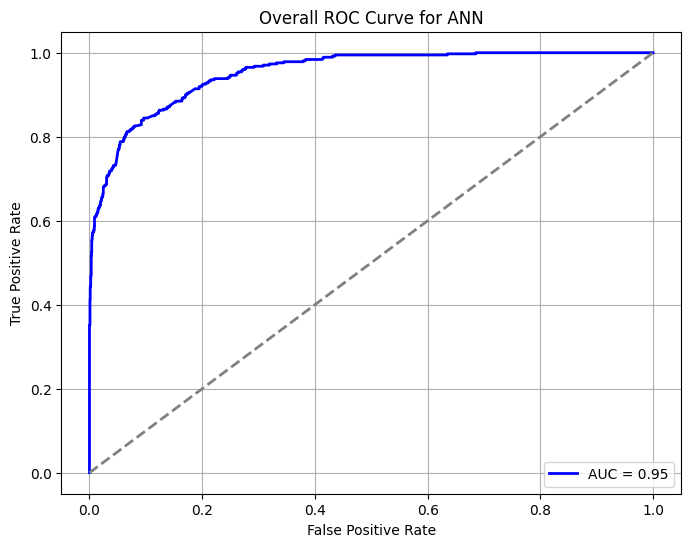

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


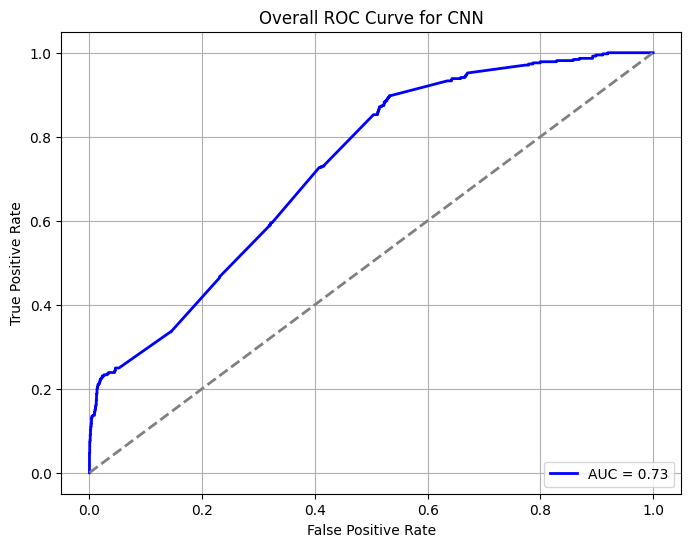

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step


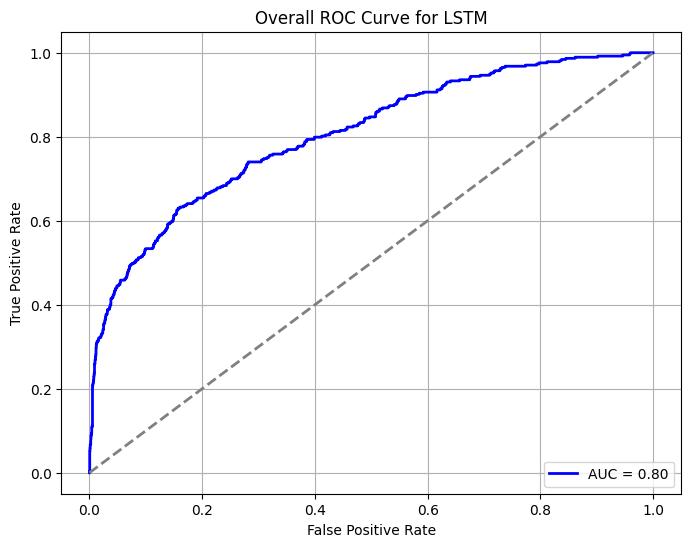

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step


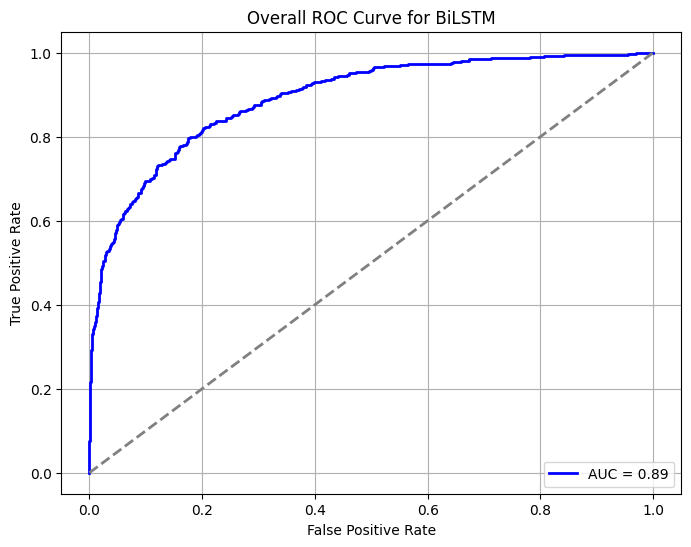

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


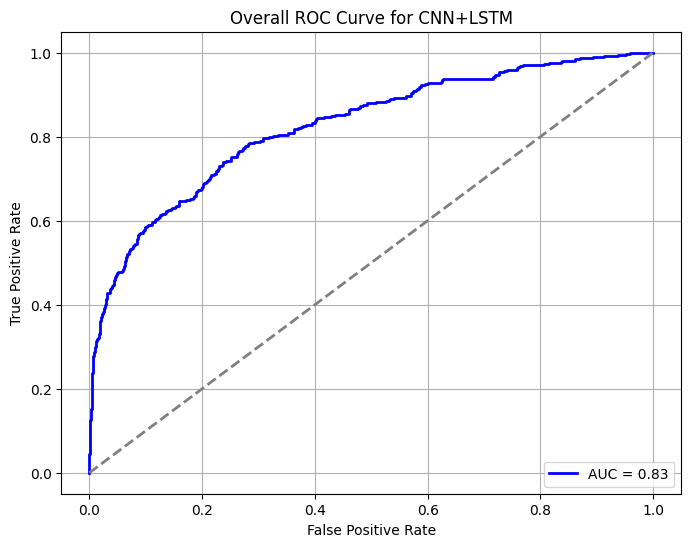

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


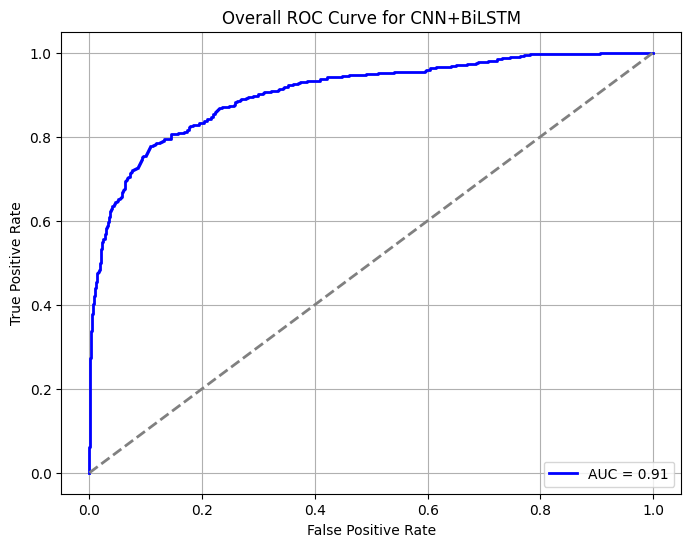

In [32]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Function to plot ROC curve for a single model (overall evaluation)
def plot_roc_curve(model, model_name, X_test, y_test):
    plt.figure(figsize=(8, 6))

    # Get probability predictions
    y_probs = model.predict(X_test)  # Model probability outputs
    y_true = np.argmax(y_test, axis=1)  # Convert one-hot to class labels
    y_pred = np.argmax(y_probs, axis=1)  # Predicted class

    # Compute overall ROC curve using micro-average approach
    fpr, tpr, _ = roc_curve(y_test.ravel(), y_probs.ravel())
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')

    # Plot random chance line
    plt.plot([0, 1], [0, 1], linestyle='dashed', color='gray', lw=2)

    # Labels & title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Overall ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Call the function for each model separately
models = [ann_model, cnn_model, lstm_model, bilstm_model, cnn_lstm_model, cnn_bilstm_model]
labels = ['ANN', 'CNN', 'LSTM', 'BiLSTM', 'CNN+LSTM', 'CNN+BiLSTM']

for model, label in zip(models, labels):
    plot_roc_curve(model, label, X_test, y_test)
